## This is a notebook that use Logistic Regression to predict the grade of the subject that only contain grade which is fail and pass.


#Import modules

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset

In [2]:
#Load the data
df=pd.read_csv(r'C:\Users\Dell\Downloads\MPU3113.csv')


In [3]:
#Display the first 7 row of data
df.head(7)

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Total CourseWorkmarks,Final Marks,Total Marks,Grade
0,1,14,8,7,4,33,38,71,PS
1,2,13,3,7,5,28,40,68,PS
2,3,15,10,10,3,38,24,62,PS
3,4,20,4,4,5,33,45,78,PS
4,5,21,5,6,5,37,40,77,PS
5,6,18,4,3,3,28,37,65,PS
6,7,16,8,8,4,36,30,66,PS


In [4]:
#Count the number  of rows and columns in the data set
df.shape

(10000, 9)

In [5]:
#Find the column that consist null value
df.isna().sum()

Student_ID               0
Assignment               0
Midterm1                 0
Midterm2                 0
Quiz                     0
Total CourseWorkmarks    0
Final Marks              0
Total Marks              0
Grade                    0
dtype: int64

In [6]:
df.describe()

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Total CourseWorkmarks,Final Marks,Total Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,17.003000,6.526200,6.520900,3.022100,33.072200,33.057100,66.129300
std,2886.89568,2.579352,2.284827,2.263023,1.408975,4.377797,7.198863,8.499694
min,1.00000,13.000000,3.000000,3.000000,1.000000,20.000000,21.000000,43.000000
25%,2500.75000,15.000000,5.000000,5.000000,2.000000,30.000000,27.000000,60.000000
50%,5000.50000,17.000000,7.000000,7.000000,3.000000,33.000000,33.000000,66.000000
75%,7500.25000,19.000000,9.000000,8.000000,4.000000,36.000000,39.000000,73.000000
max,10000.00000,21.000000,10.000000,10.000000,5.000000,46.000000,45.000000,89.000000


#Exploratory Data Analysis

In [7]:
#Get a count of the number of each grade
df['Grade'].value_counts()

PS    9836
F      164
Name: Grade, dtype: int64

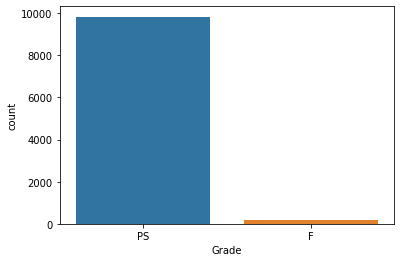

In [8]:
#Visualize the count of Grade
sns.countplot(df['Grade'], label='count')


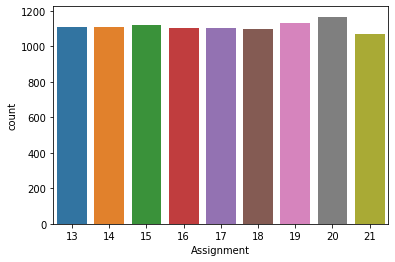

In [9]:
#Visualize the count of Assignment Score
sns.countplot(df['Assignment'], label='count')



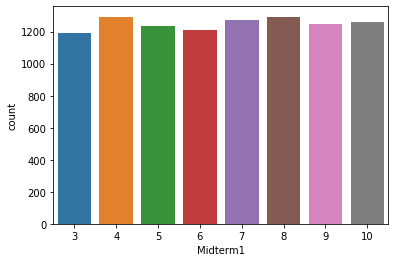

In [10]:
#Visualize the count of Midterm1 Score
sns.countplot(df['Midterm1'], label='count')


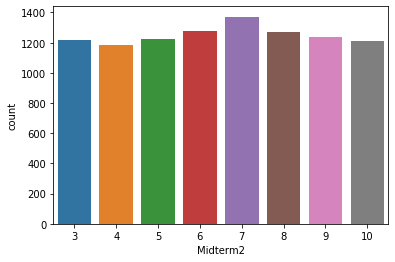

In [11]:
#Visualize the count of Midterm2 Score
sns.countplot(df['Midterm2'], label='count')


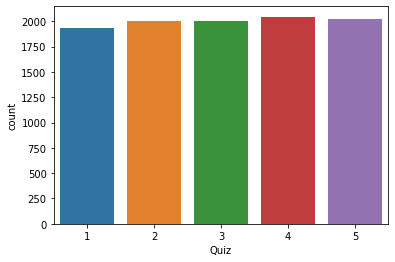

In [12]:
#VIsualize the count of Quiz
sns.countplot(df['Quiz'], label='count')

#Correlation Matrix


In [13]:
#Get the correlation of the columns
df.iloc[:,1:8].corr()

,Assignment,Midterm1,Midterm2,Quiz,Total CourseWorkmarks,Final Marks,Total Marks
Assignment,1.000000,0.009778,-0.004345,0.002073,0.592714,0.011716,0.315202
Midterm1,0.009778,1.000000,0.006770,-0.005290,0.529471,0.010054,0.281221
Midterm2,-0.004345,0.006770,1.000000,0.010911,0.521417,0.006990,0.274477
Quiz,0.002073,-0.005290,0.010911,1.000000,0.325947,0.012940,0.178840
Total CourseWorkmarks,0.592714,0.529471,0.521417,0.325947,1.000000,0.019928,0.531932
Final Marks,0.011716,0.010054,0.006990,0.012940,0.019928,1.000000,0.857220
Total Marks,0.315202,0.281221,0.274477,0.178840,0.531932,0.857220,1.000000


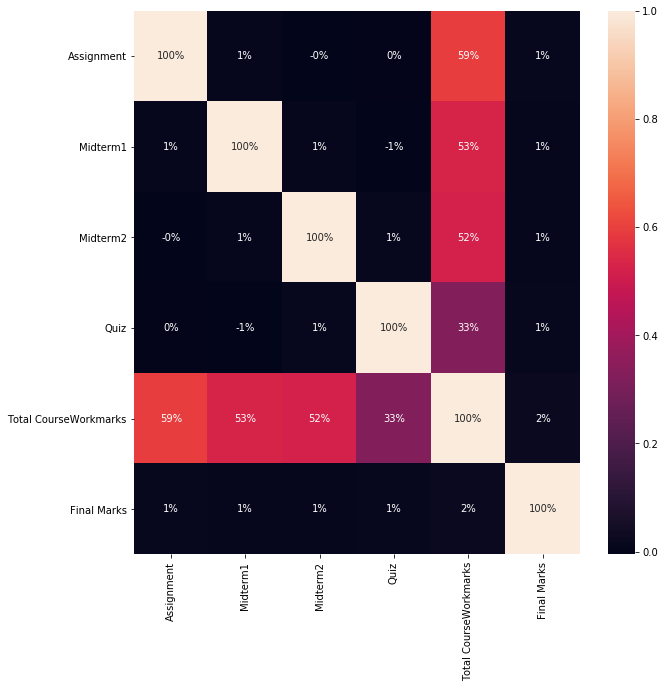

In [14]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:7].corr(), annot=True, fmt='.0%')

#Dropping column that does not related

In [15]:
df.drop(['Total CourseWorkmarks','Total Marks','Final Marks'], axis='columns', inplace=True)

In [16]:
df.shape

(10000, 6)

In [17]:
#Print the data after dropping the columns
df.head()

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Grade
0,1,14,8,7,4,PS
1,2,13,3,7,5,PS
2,3,15,10,10,3,PS
3,4,20,4,4,5,PS
4,5,21,5,6,5,PS


#Label Encoder

In [18]:
#Look at the data types to see which columns need to be encoded
df.dtypes

Student_ID     int64
Assignment     int64
Midterm1       int64
Midterm2       int64
Quiz           int64
Grade         object
dtype: object

In [19]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,5]=labelencoder_Y.fit_transform(df.iloc[:,5].values)


In [20]:
#Print the first 5 rows of the new data
df.head(5)

,Student_ID,Assignment,Midterm1,Midterm2,Quiz,Grade
0,1,14,8,7,4,1
1,2,13,3,7,5,1
2,3,15,10,10,3,1
3,4,20,4,4,5,1
4,5,21,5,6,5,1


#Splitting the data

In [21]:
#Split the data set into independent(X) and dependent(Y) data sets
X=df.iloc[:,1:5].values
Y=df.iloc[:,5].values



In [22]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.25, random_state =  0)


#Feature Scaling

In [23]:
#Scale the  data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Model Training

In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)

  
#Print the models accuracy on the training data
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  


Logistic Regression Training Accuracy: 0.9821333333333333


In [25]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix




cm = confusion_matrix(Y_test,log.predict(X_test))

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
print()


[[   2   36]
 [   0 2462]]
Testing Accuracy =  0.9856



In [26]:
#Show another way to get metrics of the models 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(Y_test, log.predict(X_test)))
print( accuracy_score(Y_test, log.predict(X_test)) )
print()

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.99      1.00      0.99      2462

    accuracy                           0.99      2500
   macro avg       0.99      0.53      0.55      2500
weighted avg       0.99      0.99      0.98      2500

0.9856



In [27]:
#Print the prediction of Logistic Regression Model
pred = log.predict(X_test)
print(pred)
print()
print(Y_test)
inv = labelencoder_Y.inverse_transform(pred)
print(inv)


[1 1 1 ... 1 1 1]

[1 1 1 ... 1 1 1]
['PS' 'PS' 'PS' ... 'PS' 'PS' 'PS']


In [28]:
import pickle
pickle_out = open("passfail.pkl","wb")
pickle.dump(log, pickle_out)
pickle_out.close()